# <center> <b style='font-size:1.5rem'> Projet: “Churn finance” </b> </center>

#### Objectif :
    Développer un modèle d’apprentissage automatique capable de prédire si les clients d’une banque quittent ou non la banque.

<div style='font-size:1.8em; color: black'>
 <b>

    - To Perform EDA.
    - Derive Insights from Data.
    - Converting data from numeric to descriptive.
    - Built Different Classification Models.

</b> </div>
<br>

## Installation & importation des librairies nécessaires

In [ ]:
!mkdir data

In [ ]:
!gdown 1IGFx1FgzIYfEIq3viV10tx2sG_36YgUm -O data/churn.csv

Downloading...
From: https://drive.google.com/uc?id=1IGFx1FgzIYfEIq3viV10tx2sG_36YgUm
To: /content/data/churn.csv
100% 685k/685k [00:00<00:00, 108MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
from ipywidgets import interact

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve,f1_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.utils import resample, shuffle
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing

## Importation du dataset

In [ ]:
df=pd.read_csv("/content/data/churn.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Comprendre les données

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Il y a au total **10 000 enregistrements** et **14 colonnes** disponibles dans l'ensemble de données. * **Sur 14 colonnes**, il y a **11 colonnes numériques** et **3 colonnes catégorielles.**

In [ ]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

#### Explication des variables:


  - RowNumber : Identifiant unique pour chaque enregistrement et ne contribue pas directement à l'analyse.
  - CustomerId : Pour différencier les clients individuels au sein de l'ensemble de données.
  - Surname : Nom de famille de chaque client.
  - CreditScore: Solvabilité d'un individu.
  - Geography : Répartition géographique des clients.
  - Gender: Genre (Femme / Homme).
  - Age : Âge du client.
  - Tenure: Nombre d'années ou de mois pendant lesquels le client est associé à la banque.
  - Balance: Montant d'argent sur le compte bancaire du client à un moment précis.
  - NumOfProducts: Produit bancaire utilisé, tel que des comptes d'épargne, des prêts, des cartes de crédit, etc.
  - HasCrCard: Statut de la carte de crédit (0 = Non, 1 = Oui).
  - IsActiveMember: statut d'adhésion actif (0 = Non, 1 = Oui).
  - EstimatedSalary: Salaire estimé.
  - Exited: abandonné ou pas ? (0 = Non, 1 = Oui). C'est la variable que nous cherchons à prédire en utilisant les autres fonctionnalités.

#### Analyse statistique descriptive sur des colonnes numériques

In [ ]:
# Calculons les statistiques descriptives
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Nous pouvons constater après les résulats statistiques que les variables comme (**Balance, EstimatedSalary**) ont différents echelle. **Balance** varie entre 0.00 et 250898.09 tandis que **EstimatedSalary** varie entre 51002.11 et 199992.48. Les algorithmes de machine learning fonctionne mieux avec des variables standardisées ou normslisées.

#### Analyse statistique descriptive sur des colonnes catégorielles

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


## Manipulation des données

**Les colonnes "RowNumber", "CustomerId" et "Surname" représentent une valeur unique pour chaque client et ne semblent pas pertinentes pour prédire le désabonnement des clients ou non. Nous pouvons donc simplement supprimer ces fonctionnalités.**

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

##### Renommer le nom de la variable cible et ses valeurs avec des valeurs plus appropriées pour une meilleure analyse.

In [ ]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [ ]:
# Remplacer les valeurs binaires par "Yes" et "No"
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


##### Calcul des valeurs uniques

In [ ]:
for col in df.columns:
    print(f'{col:-<50}{df[col].nunique()} éléments uniques')

CreditScore---------------------------------------460 éléments uniques
Geography-----------------------------------------3 éléments uniques
Gender--------------------------------------------2 éléments uniques
Age-----------------------------------------------70 éléments uniques
Tenure--------------------------------------------11 éléments uniques
Balance-------------------------------------------6382 éléments uniques
NumOfProducts-------------------------------------4 éléments uniques
HasCrCard-----------------------------------------2 éléments uniques
IsActiveMember------------------------------------2 éléments uniques
EstimatedSalary-----------------------------------9999 éléments uniques
Churned-------------------------------------------2 éléments uniques


## Analyse exploratoire des données

<ipython-input-18-1d6471cc255a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df["Churned"],palette="Set2")


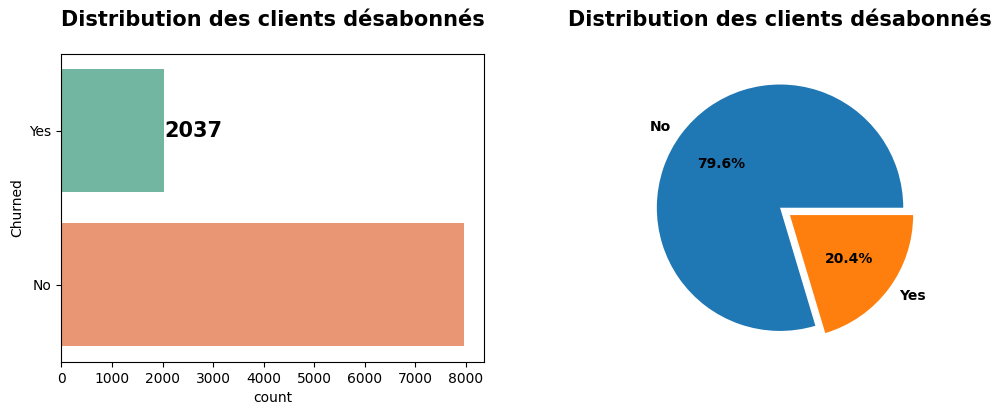

In [ ]:
count = df["Churned"].value_counts()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Distribution des clients désabonnés",fontweight="black",size=15,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Distribution des clients désabonnés",fontweight="black",size=15,pad=20)
plt.show()

**Il y a plus de clients qui ne se sont pas désabonnées(près de 80%) que de clients qui se sont désabonnée(environ 20%). Donc nous avons un problème de désiquilibre qu'il faudra absolument résoudre car cela peut impacter négativement la performance des modèles de classification que nous allons construire après.**

In [ ]:
def countplot(column):
    plt.figure(figsize=(10,4))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Clientèle désabonnée par {column}",fontweight="black",size=20,pad=20)
    plt.show()

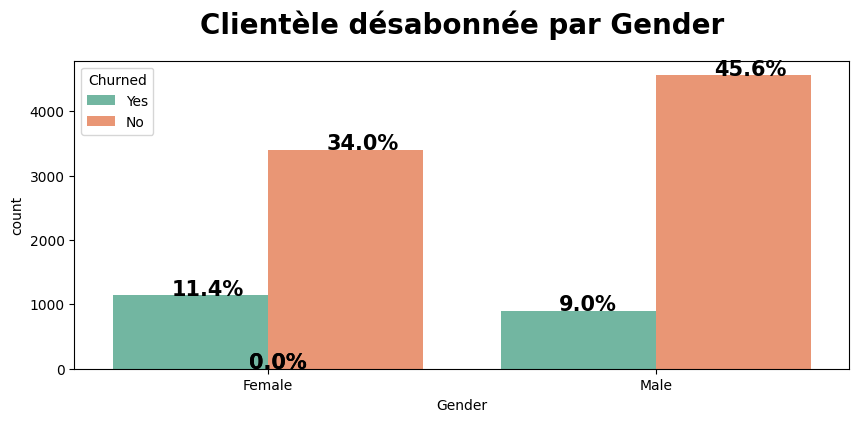

In [ ]:
countplot("Gender")

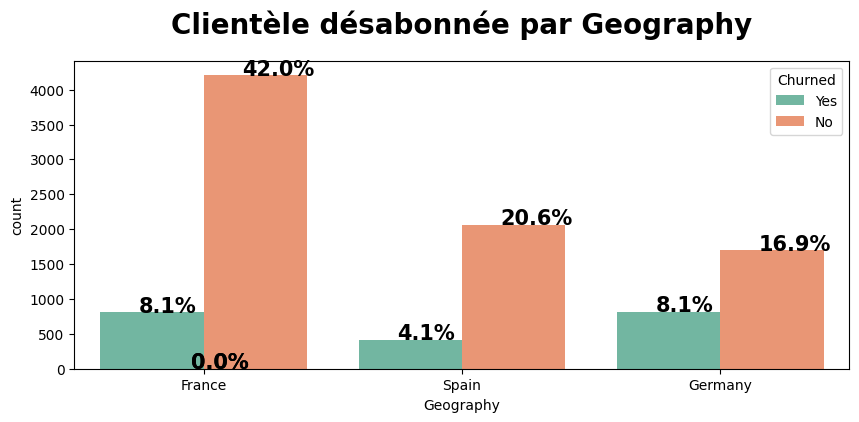

In [ ]:
countplot("Geography")

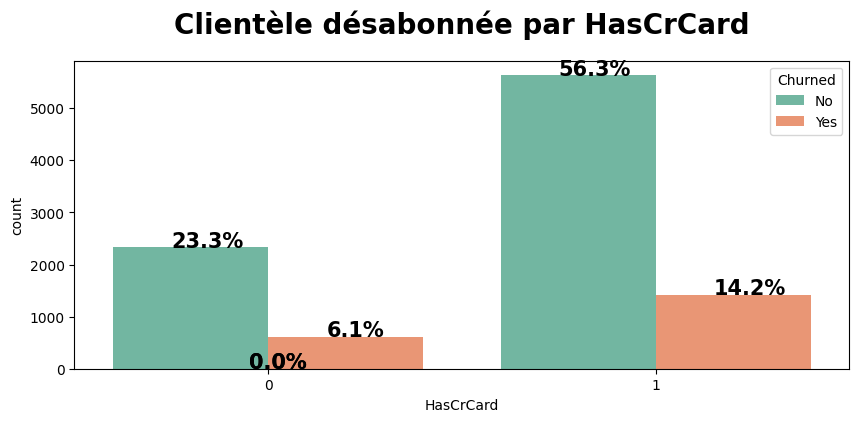

In [ ]:
countplot("HasCrCard")

In [ ]:
num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

# Creation d'une fonction de contaruction d'histogramme de manière interactive
def hist_plot(b):
  sns.histplot(df[b], bins=20, kde=True)
  plt.ylabel('Nombre de clients')
  plt.title('Distribution de '+str(b))
  return plt.show()


In [ ]:
interact(hist_plot, b = num_cols);

interactive(children=(Dropdown(description='b', options=('Age', 'CreditScore', 'Balance', 'EstimatedSalary'), …

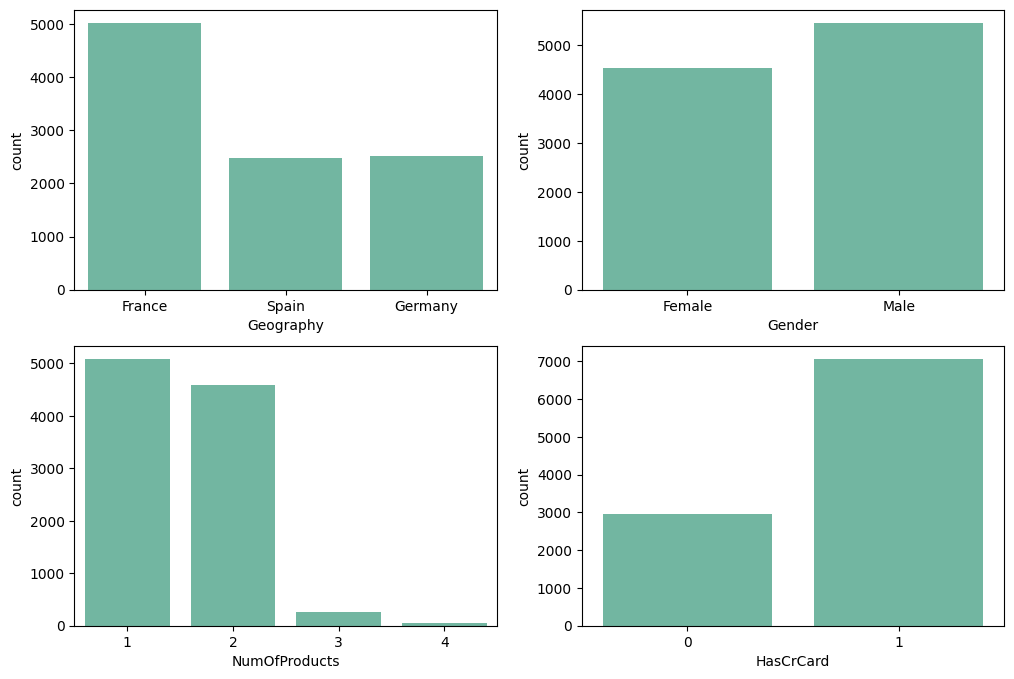

In [ ]:
# Tracer les diagrammes de comptage pour chaque variable
cols = 'Geography,Gender,NumOfProducts,HasCrCard'.split(',')

i =1
plt.figure(figsize= (12, 8))
for col in cols:
    plt.subplot(2,2,i)
    sns.countplot(x=df[col])
    i = i +1

plt.show()

## Prétraitement des données

#### Calcul du nombre total de valeurs manquantes.

In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churned            0
dtype: int64

Pas de valeur manquante.

#### Vérification des enregistrements en double

In [ ]:
df[df.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned


Il n’y a aucun enregistrement en double présent dans l’ensemble de données.

#### Conversion des colonnes « objet » en « entier »

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.rename(columns={"Churned":"Exited"},inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Corrélation

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001


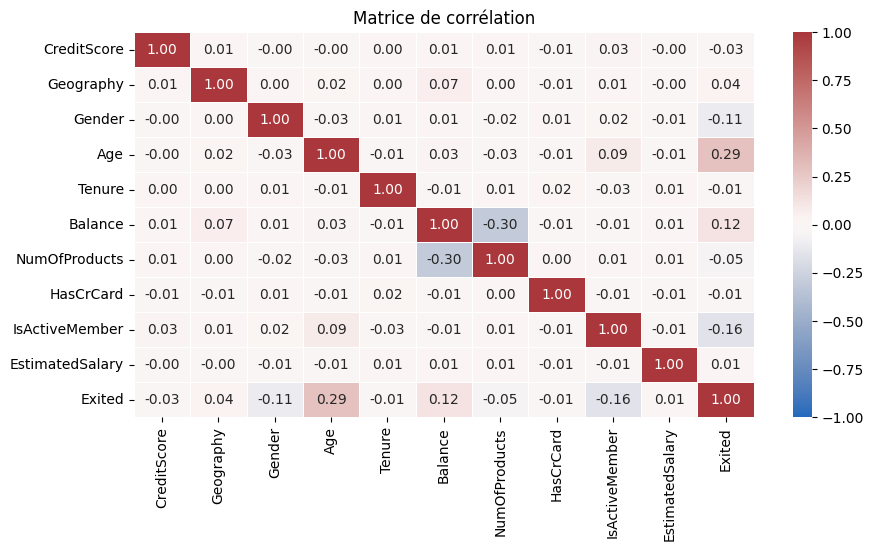

In [ ]:
# Identifier les corrélations entre les variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values, cmap = 'vlag',
            annot = True,vmin=-1, vmax=1,fmt=".2f",linewidth=.5,)
plt.title('Matrice de corrélation')
# plt.show()
correlation_matrix.head()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

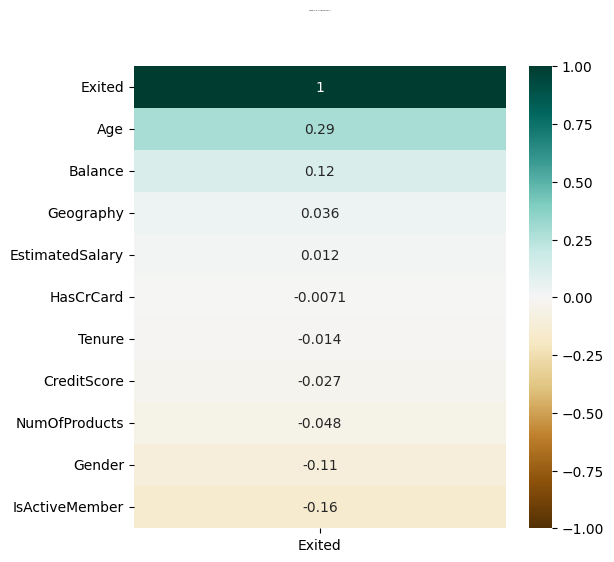

In [ ]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(correlation_matrix[['Exited']].sort_values(by='Exited', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of Correlation Matrix',fontdict={'fontsize':1}, pad=40)

## Construction du model

##### Séparation des données en train et test

In [ ]:
X = df.drop(columns = ['Exited'])
Y = df.iloc[:,-1]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

###### Nous allons diviser les données en ensemble d'entraînement et de test dans un rapport de 70/30 respectivement

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42, stratify=Y)
print('X_train {}'.format(X_train.shape))
print('y_train {}'.format(X_test.shape))
print('X_test  {}'.format(y_train.shape))
print('y_test  {}'.format(y_test.shape))

X_train (7000, 10)
y_train (3000, 10)
X_test  (7000,)
y_test  (3000,)


In [ ]:
# X_train = X_train.values
# X_test = X_test.values

## Résolution du problème de déséquilibre de classe

In [ ]:
pd.DataFrame(Y).value_counts(normalize=True)

Exited
0         0.7963
1         0.2037
dtype: float64

Dans notre cas, il y a presque de 80% de personnes qui n'ont pas résilié leur abonnement contre environ 20% qui ont résilié leur abonnement. Il y a donc un grand déséquilibre de classe. Nous pouvons donc soit sur-échantillonné ou sous-échantillonné.

In [ ]:
# Sur-échantillonnage de la classe minoritaire
X2 = X_train.copy()

X2['Exited'] = y_train.values

minority = X2[X2.Exited == 1]

majority = X2[X2.Exited == 0]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=1111)

upsampled = pd.concat([majority, minority_upsampled])

upsampled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9136,595,0,1,20,4,95830.43,1,1,0,177738.98,0
6410,689,2,0,63,1,0.00,2,1,1,186526.12,0
2607,814,0,1,31,1,118870.92,1,1,0,101704.19,0
3201,722,0,1,20,6,0.00,2,1,0,195486.28,0
3330,738,0,1,18,4,0.00,2,1,1,47799.15,0
...,...,...,...,...,...,...,...,...,...,...,...
5310,622,1,1,42,9,115766.26,1,0,0,72155.85,1
4827,636,2,1,52,4,111284.53,1,0,1,32936.44,1
7724,842,0,1,44,3,141252.18,4,0,1,128521.16,1
2564,667,0,0,38,6,144432.04,1,1,1,73963.17,1


In [ ]:
# Vérification des proportions
upsampled['Exited'].value_counts(normalize=True)

0    0.5
1    0.5
Name: Exited, dtype: float64

In [ ]:
X_train_up = upsampled.drop(columns = ['Exited'])
y_train_up = upsampled.iloc[:,-1]

In [ ]:
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_train_up, y_train_up, test_size=0.3, random_state = 42, stratify=y_train_up)
print('X_train_up {}'.format(X_train_up.shape))
print('y_train_up {}'.format(X_test_up.shape))
print('X_test_up  {}'.format(y_train_up.shape))
print('y_test_up  {}'.format(y_test_up.shape))

X_train_up (7803, 10)
y_train_up (3345, 10)
X_test_up  (7803,)
y_test_up  (3345,)


In [ ]:
X_train_up.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4046,650,0,1,37,9,0.00,2,1,0,17974.08
9641,680,0,1,34,9,0.00,2,1,1,95686.60
4396,721,1,1,68,4,136525.99,1,0,0,175399.14
5547,688,0,1,38,7,148045.68,1,1,0,175479.92
7818,542,1,1,25,8,139330.10,1,0,0,54372.37


In [ ]:
y_train_up.head()

4046    0
9641    0
4396    0
5547    1
7818    0
Name: Exited, dtype: int64

In [ ]:
y_test_up.head()

6357    0
2502    0
4991    0
3036    0
6472    1
Name: Exited, dtype: int64

In [ ]:
# Définition des données d'entrainement
# Choix possibles: (X_train, y_train), (X_train_up, y_train_up)

train_x = X_train_up
train_y = y_train_up
test_x = X_test_up
test_y = y_test_up

## Normalisation

In [ ]:
# Normalisation
scaler = MinMaxScaler()

mod_scaler = scaler.fit(train_x)
# mod_scale = scaler.fit(X_test)

train_x = mod_scaler.transform(train_x)
test_x = mod_scaler.transform(test_x)

X_train = mod_scaler.transform(X_train)
X_test = mod_scaler.transform(X_test)

In [ ]:
# Retransformatio en DataFrame

train_x = pd.DataFrame(train_x, columns = X.columns)
test_x = pd.DataFrame(test_x, columns = X.columns)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [ ]:
# Toute les variables sont entre 0 et 1

train_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.600,0.0,1.0,0.256757,0.9,0.000000,0.333333,1.0,0.0,0.089821
1,0.660,0.0,1.0,0.216216,0.9,0.000000,0.333333,1.0,1.0,0.478421
2,0.742,0.5,1.0,0.675676,0.4,0.616279,0.000000,0.0,0.0,0.877022
3,0.676,0.0,1.0,0.270270,0.7,0.668279,0.000000,1.0,0.0,0.877425
4,0.384,0.5,1.0,0.094595,0.8,0.628937,0.000000,0.0,0.0,0.271830


In [ ]:
test_x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.282,0.0,0.0,0.675676,0.3,0.485579,0.000000,0.0,1.0,0.568476
1,0.354,0.0,1.0,0.189189,0.0,0.000000,0.000000,1.0,0.0,0.547614
2,0.286,0.0,0.0,0.202703,0.8,0.409834,0.000000,1.0,1.0,0.298268
3,0.618,0.0,1.0,0.337838,0.1,0.478875,0.333333,1.0,0.0,0.134458
4,0.602,0.5,0.0,0.216216,1.0,0.672417,0.000000,1.0,0.0,0.331921


### Choix du metrique

- **accuracy:** precision global du model.
- **precision:** sur tout les points positifs prédits, combien etait de vrais positifs.
- **recall:** capacité du model à identifier tous les vrais positifs.
- **F1 score:** Moyenne harmonique de precision et recall.

**Nous allons nous baser sur la metrique F1 score pour l'interpretation**

#### Nous allons tester différents modèles afin de choisir le modèle avec un meilleur metrique

Ci-dessous une liste de cinq(5) algorithme de machine learning les plus utilisés afin de choisir le meilleur modèle:
- Machine à vecteur de support (SVM)
- Méthodes des K plus proches voisins (KNN)
- Arbre de decision (Decision tree)
- Forêt d'arbres décisionnels (Random Forest)
- Régression Logistique (Logistic regression)

### Implementation du model SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_x, train_y)

SVC()

Accuracy Score SVC: 77.19 %
Precision Score SVC: 77.43 %
Recall Score SVC: 76.73 %
F1 Score SVC: 77.08 %


<Axes: >

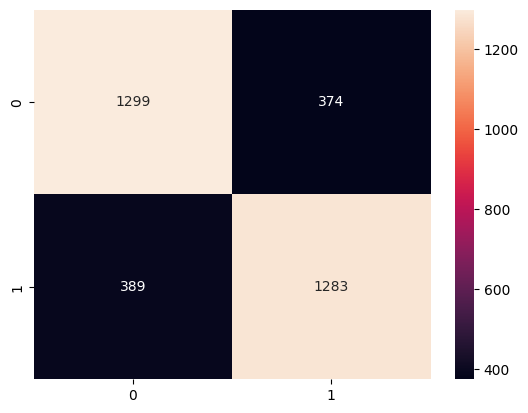

In [ ]:
# Prediction
y_test_pred_svm = svm.predict(test_x)

# Calcul des metriques
as_svc = accuracy_score(test_y,y_test_pred_svm)
ps_svc = precision_score(test_y,y_test_pred_svm)
rs_svc = recall_score(test_y,y_test_pred_svm)
f1_svc = f1_score(test_y,y_test_pred_svm)

print('Accuracy Score SVC:',round(as_svc*100,2),"%")

print('Precision Score SVC:',round(ps_svc*100,2),"%")

print('Recall Score SVC:',round(rs_svc*100,2),"%")

print('F1 Score SVC:',round(f1_svc*100,2),"%")

# Matrix de confusion
cm = confusion_matrix(test_y, y_test_pred_svm)
sns.heatmap(cm,annot=True,fmt="d")

### Implementation du model K plus proches voisins (KNN)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_x, train_y)

KNeighborsClassifier()

Accuracy Score KNN: 77.94 %
Precision Score KNN: 74.58 %
Recall Score KNN: 84.75 %
F1 Score KNN: 79.34 %


<Axes: >

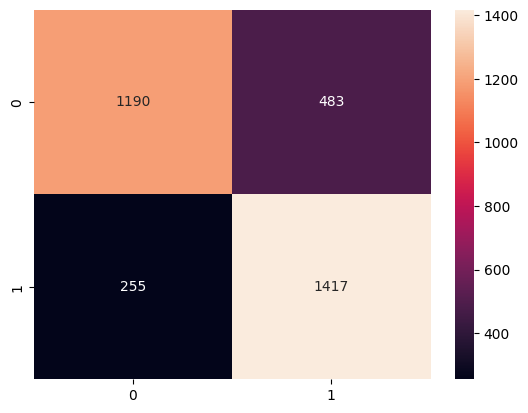

In [ ]:
# Prediction
y_test_pred_knn = knn_model.predict(test_x)

# Calcul des metriques
as_knn = accuracy_score(test_y,y_test_pred_knn)
ps_knn = precision_score(test_y,y_test_pred_knn)
rs_knn = recall_score(test_y,y_test_pred_knn)
f1_knn = f1_score(test_y,y_test_pred_knn)

print('Accuracy Score KNN:',round(as_knn*100,2),"%")

print('Precision Score KNN:',round(ps_knn*100,2),"%")

print('Recall Score KNN:',round(rs_knn*100,2),"%")

print('F1 Score KNN:',round(f1_knn*100,2),"%")

# Matrix de confusion
cm = confusion_matrix(test_y, y_test_pred_knn)
sns.heatmap(cm,annot=True,fmt="d")

### Implementation du model Arbre de decision (Decision tree)

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_x, train_y)

DecisionTreeClassifier()

Accuracy Score SVC: 90.31 %
Precision Score SVC: 85.18 %
Recall Score SVC: 97.61 %
F1 Score SVC: 90.97 %


<Axes: >

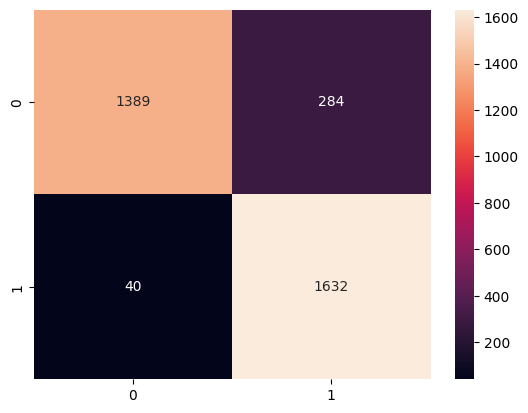

In [ ]:
# Prediction
y_test_pred_dt = model_dt.predict(test_x)

# Calcul des metriques
as_dt = accuracy_score(test_y,y_test_pred_dt)
ps_dt = precision_score(test_y,y_test_pred_dt)
rs_dt = recall_score(test_y,y_test_pred_dt)
f1_dt = f1_score(test_y,y_test_pred_dt)

print('Accuracy Score DT:',round(as_dt*100,2),"%")

print('Precision Score DT:',round(ps_dt*100,2),"%")

print('Recall Score DT:',round(rs_dt*100,2),"%")

print('F1 Score DT:',round(f1_dt*100,2),"%")

# Matrix de confusion
cm = confusion_matrix(test_y, y_test_pred_dt)
sns.heatmap(cm,annot=True,fmt="d")

### Implementation du model Random Forest Classifier

In [ ]:
model_rfc=RandomForestClassifier()

In [ ]:
model_rfc.fit(train_x, train_y)

RandomForestClassifier()

Accuracy Score RFC: 94.17 %
Precision Score RFC: 91.14 %
Recall Score RFC: 97.85 %
F1 Score RFC: 94.38 %


<Axes: >

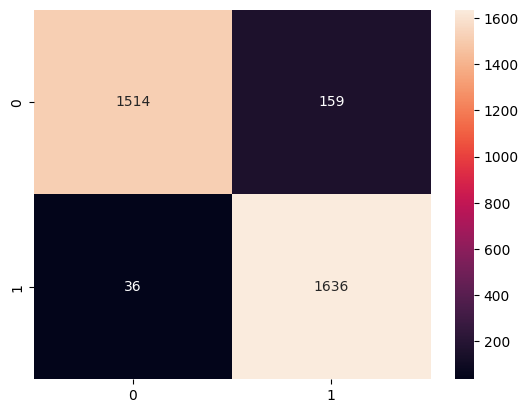

In [ ]:
# Prediction
y_test_pred_rfc = model_rfc.predict(test_x)

# Calcul des metriques
as_rfc = accuracy_score(test_y,y_test_pred_rfc)
ps_rfc = precision_score(test_y,y_test_pred_rfc)
rs_rfc = recall_score(test_y,y_test_pred_rfc)
f1_rfc = f1_score(test_y,y_test_pred_rfc)

print('Accuracy Score RFC:',round(as_rfc*100,2),"%")

print('Precision Score RFC:',round(ps_rfc*100,2),"%")

print('Recall Score RFC:',round(rs_rfc*100,2),"%")

print('F1 Score RFC:',round(f1_rfc*100,2),"%")

# Matrix de confusion
cm = confusion_matrix(test_y, y_test_pred_rfc)
sns.heatmap(cm,annot=True,fmt="d")

### Implementation du model Régression Logistique (Logistic regression)

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(train_x, train_y)

LogisticRegression()

Accuracy Score LR: 67.86 %
Precision Score LR: 68.12 %
Recall Score LR: 67.11 %
F1 Score LR: 67.61 %


<Axes: >

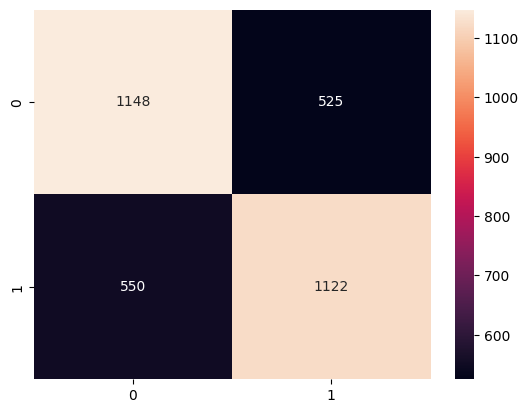

In [ ]:
# Prediction
y_test_pred_lr = model_lr.predict(test_x)

# Calcul des metriques
as_lr = accuracy_score(test_y,y_test_pred_lr)
ps_lr = precision_score(test_y,y_test_pred_lr)
rs_lr = recall_score(test_y,y_test_pred_lr)
f1_lr = f1_score(test_y,y_test_pred_lr)

print('Accuracy Score LR:',round(as_lr*100,2),"%")

print('Precision Score LR:',round(ps_lr*100,2),"%")

print('Recall Score LR:',round(rs_lr*100,2),"%")

print('F1 Score LR:',round(f1_lr*100,2),"%")

# Matrix de confusion
cm = confusion_matrix(test_y, y_test_pred_lr)
sns.heatmap(cm,annot=True,fmt="d")

### Choix et comparaison

In [ ]:
model_df = pd.DataFrame(
    {'Models':
         ['SVM',
          'KNN', 'Decision Tree','Random Forest',
          'Logistic Regression'],
     'Accuracy Score':
         [as_svc,as_knn,as_dt,as_rfc,as_lr],
     'Precision Score':
         [ps_svc,ps_knn,ps_dt,ps_rfc,ps_lr],
     'Recall Score':
         [rs_svc,rs_knn,rs_dt,rs_rfc,rs_lr],
     'F1 Score':
         [f1_svc,f1_knn,f1_dt,f1_rfc,f1_lr],
    })

In [ ]:
# model_df

In [ ]:
fig = go.Figure(data=[
    go.Table(
        header=dict(values=[
            '<b>Models<b>',
            '<b>Accuracy Score<b>',
            '<b>Precision Score<b>',
            '<b>Recall Score<b>',
            '<b>F1 Score<b>'
        ],
        line_color='darkslategray',
        fill_color='whitesmoke',
        align=['center','center'],
        font=dict(color='black', size=12),
        height=20),
        cells=dict(values=[
            ['<b>SVM<b>', '<b>KNN<b>','<b>Decision three<b>', '<b>Random Forest<b>', '<b>Logistic regression<b>'],
            [round(as_svc*100,2),round(as_knn*100,2),round(as_dt*100,2),round(as_rfc*100,2),round(as_lr*100,2)],
            [round(ps_svc*100,2),round(ps_knn*100,2),round(ps_dt*100,2),round(ps_rfc*100,2),round(ps_lr*100,2)],
            [round(rs_svc*100,2),round(rs_knn*100,2),round(rs_dt*100,2),round(rs_rfc*100,2),round(rs_lr*100,2)],
            [round(f1_svc*100,2),round(f1_knn*100,2),round(f1_dt*100,2),round(f1_rfc*100,2),round(f1_lr*100,2)]
        ])
    )
])

fig.update_layout(title='Model Results On Test Data')
fig.show()


### Visualiser les metrics

In [ ]:
num_cols = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']

def hist_metrics(b):
  sns.barplot(data=model_df,y=model_df['Models'],x=model_df[b])
  plt.ylabel('Models')
  plt.title('Metrics '+str(b))
  return plt.show()

In [ ]:
interact(hist_metrics, b = num_cols);

interactive(children=(Dropdown(description='b', options=('Accuracy Score', 'Precision Score', 'Recall Score', …

#### Le meilleur modèle est le  **Random Forest Classifier** avec un F1 score de 94,38 % également avec de meilleur resultat sur les autres metriques par rapport aux autres models, suggèrant sa capacité à bien se généraliser à des instances invisibles.

### Selection des variables importants

<ipython-input-193-9bdfbe87bb77>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




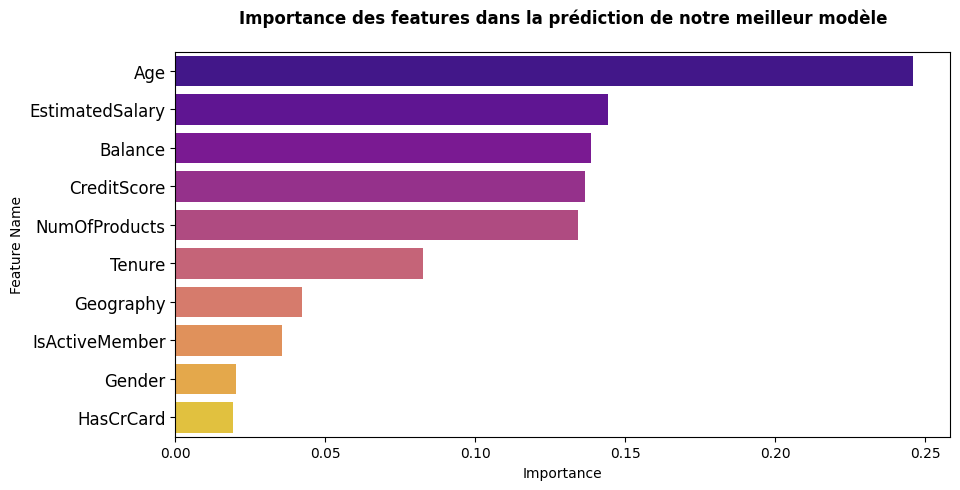

In [ ]:
imp_df = pd.DataFrame({"Feature Name":X.columns,
                       "Importance":model_rfc.feature_importances_})

features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Importance des features dans la prédiction de notre meilleur modèle", fontweight="black", size=12, pad=20)
plt.yticks(size=12)
plt.show()

In [ ]:
# # selection des variables selon son importance pour la prediction de churn
# features = pd.Series(model_rfc.feature_importances_, index=train_x.columns).sort_values(ascending=False)
# seuil = 0.05
# var_selcted= features[features > seuil].index.to_list()
# train_x_selected = train_x[var_selcted]

In [ ]:
# train_x_selected

### Recursive Feature Eliminator (RFE)

La methode va utiliser l'algorithme de RFE pour nous retourner les features les plus pertinentes.

**L'algorithme RFE nous a fait resortir les variables les plus importants pour la prediction**

In [ ]:
# # Fonction RFE
# def model_with_rfe(model, trainX, trainY):
#   rfe_model = RFE(estimator=model, verbose=0)
#   rfe_model.fit(trainX, trainY)
#   mask = rfe_model.support_
#   reducted_X = trainX.loc[:, mask]
#   print(reducted_X.columns)
#   data = reducted_X
#   return rfe_model, data

In [ ]:
# # selection de features important
# rfe_model_rfc, data = model_with_rfe(model_rfc.base_estimator_, train_x, train_y)

# rfe_model_rfc

In [ ]:
rfe_model = RFE(estimator=model_rfc, verbose=1)
rfe_model_rfc = rfe_model.fit(train_x, train_y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [ ]:
mask = rfe_model_rfc.support_
mask

array([ True, False, False,  True, False,  True,  True, False, False,
        True])

In [ ]:
# Les variables selectionner
reduced2_X = train_x.loc[:, mask]

reduced2_X

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
0,0.600,0.256757,0.000000,0.333333,0.089821
1,0.660,0.216216,0.000000,0.333333,0.478421
2,0.742,0.675676,0.616279,0.000000,0.877022
3,0.676,0.270270,0.668279,0.000000,0.877425
4,0.384,0.094595,0.628937,0.000000,0.271830
...,...,...,...,...,...
7798,0.832,0.256757,0.449866,0.333333,0.738517
7799,0.340,0.337838,0.680735,0.666667,0.126619
7800,0.796,0.567568,0.687644,0.000000,0.633719
7801,0.706,0.351351,0.446266,0.000000,0.757598


**Les facteurs clés qui influencent de manière significative la désactivation  bancaires des clients sont :**
- CreditScore
- Age
- Balance
- NumOfProducts
- EstimatedSalary

**L'impact minimal des features sur la désactivation des services bancaires des clients sont :**
- Tenure
- IsActiveMember
- Geography
- HasCrCard
- Gender


In [ ]:
# Evaluation du modèle avec RFE
rfe_score_train = rfe_model_rfc.score(train_x, train_y)

rfe_score_train

1.0

In [ ]:
rfe_model_test = rfe_model_rfc.score(test_x, test_y)

rfe_model_test

0.9192825112107623

In [ ]:
# Prediction
pred_rfe = rfe_model_rfc.predict(test_x)

# Calcul des metriques
a_rfc = accuracy_score(test_y,pred_rfe)
p_rfc = precision_score(test_y,pred_rfe)
r_rfc = recall_score(test_y,pred_rfe)
f1_rf = f1_score(test_y,pred_rfe)

# Afficher les accurracy
results = pd.DataFrame([['Random Forest Classifier',a_rfc,f1_rf,p_rfc,r_rfc]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Random Forest Classifier,0.919283,0.923339,0.878919,0.972488


In [ ]:
# rfe_model2 = RFE(estimator = model_rfc, n_features_to_select = 6)

# rfe_model2.fit(train_x, train_y)

# mask2 = rfe_model2.support_

# reduced2_X = train_x.loc[:, mask2]

# reduced2_X

## Prédiction de churn

In [ ]:
train_x.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.6,0.0,1.0,0.256757,0.9,0.0,0.333333,1.0,0.0,0.089821


In [ ]:
train_x.shape

(10000, 10)

In [ ]:
train_x.values

array([[0.6       , 0.        , 1.        , ..., 1.        , 0.        ,
        0.08982108],
       [0.66      , 0.        , 1.        , ..., 1.        , 1.        ,
        0.47842079],
       [0.742     , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.87702156],
       ...,
       [0.796     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.63371927],
       [0.706     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.75759795],
       [0.758     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.52703898]])

In [ ]:
train_x.values[0]

array([0.6       , 0.        , 1.        , 0.25675676, 0.9       ,
       0.        , 0.33333333, 1.        , 0.        , 0.08982108])

In [ ]:
train_x.values[0].shape

(10,)

In [ ]:
train_x.values[0].reshape(1, -1).shape

(1, 10)

In [ ]:
train_x.values[0].reshape(1, -1)

array([[0.6       , 0.        , 1.        , 0.25675676, 0.9       ,
        0.        , 0.33333333, 1.        , 0.        , 0.08982108]])

In [ ]:
scaler.inverse_transform(train_x.values[0].reshape(1, -1))

array([[6.500000e+02, 0.000000e+00, 1.000000e+00, 3.700000e+01,
        9.000000e+00, 0.000000e+00, 2.000000e+00, 1.000000e+00,
        0.000000e+00, 1.797408e+04]])

In [ ]:
prediction = model_rfc.predict(scaler.inverse_transform(train_x.values[0].reshape(1, -1)))
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
prediction

array([1])

In [ ]:
prediction = model_rfc.predict(scaler.inverse_transform(train_x.values[1].reshape(1, -1)))
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
prediction = model_rfc.predict(scaler.inverse_transform(train_x.values[2].reshape(1, -1)))
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



## Extraction du fichier modèle pour le déploiement

In [ ]:
import pickle

In [ ]:
# Export du model
pickle.dump(model_rfc,open('rfcmodel.pkl','wb'))

# Export du model normaliser
pickle.dump(mod_scaler,open('scaling.pkl','wb'))

In [ ]:
# Chargement du model
pickled_model=pickle.load(open('rfcmodel.pkl','rb'))

# Chargement du model normaliser
pickled_scaling=pickle.load(open('scaling.pkl','rb'))

## test

In [ ]:
df_test = df.drop(columns = ['Exited'])

In [ ]:
df_test.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.0,1,1,1,101348.88


In [ ]:
df_test.values[0].shape

(10,)

In [ ]:
df_test.values[0].reshape(1, -1)

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, 4.2000000e+01,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05]])

In [ ]:
tr = pickled_scaling.transform(df_test.values[0].reshape(1, -1))
tr

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



array([[0.538     , 0.        , 0.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489]])

In [ ]:
in_tr = pickled_scaling.inverse_transform(tr)
in_tr

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, 4.2000000e+01,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05]])

In [ ]:
# Prediction
pickled_model.predict(scaler.inverse_transform(train_x.values[2].reshape(1, -1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([1])

##### =====================================================================================